In [ ]:
# confidence and prediction intervals with StatsModels
# https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

In [3]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#measurements genre
nmuestra = 100

x = np.linspace(0, 10, nmuestra)
e = np.random.normal(size=nmuestra)
y = 1 + 0.5*x + 2*e
X = sm.add_constant(x)

re = sm.OLS(y, X).fit()
# print the result type Stata
print(re.summary())

prstd, iv_l, iv_u = wls_prediction_std(re)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     93.20
Date:                Mon, 08 Jan 2018   Prob (F-statistic):           6.83e-16
Time:                        10:24:11   Log-Likelihood:                -205.10
No. Observations:                 100   AIC:                             414.2
Df Residuals:                      98   BIC:                             419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1650      0.377      0.437      0.6

0.0
0.0
0.0


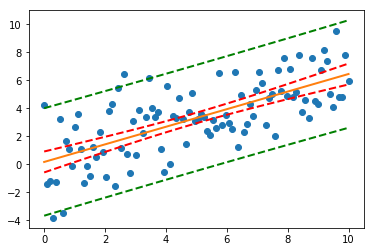

In [15]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# check we got the right things
print(np.max(np.abs(re.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'g--', lw=2)
plt.plot(x, predict_ci_upp, 'g--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()